# Zadanie 1/2

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib

from categorizer import Normalizer
from categorizer import Analyzer

#Import json data into DF
#dataset: https://www.kaggle.com/rmisra/news-category-dataset
src = 'News_Category_Dataset_v2.json'
normalizer = Normalizer(src)



normalizer.load_file_json()



normalizer.data.head(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
95,POLITICS,Trump Lawyer Attended DOJ Meeting On Confident...,Igor Bobic and Ryan J. Reilly,https://www.huffingtonpost.com/entry/doj-meeti...,"Emmet Flood, the White House attorney dealing ...",2018-05-24
96,POLITICS,Senate Advances Court Pick Who Said Planned Pa...,Jennifer Bendery,https://www.huffingtonpost.com/entry/wendy-vit...,Every Republican on the judiciary committee vo...,2018-05-24
97,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...,S.V. Date,https://www.huffingtonpost.com/entry/trump-giu...,The canceled North Korea summit doesn’t mean t...,2018-05-24
98,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...,Nina Golgowski,https://www.huffingtonpost.com/entry/judge-can...,"Danny Alvarez, a married of father of three, w...",2018-05-24


In [2]:
normalizer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   authors            200853 non-null  object
 3   link               200853 non-null  object
 4   short_description  200853 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB
None


In [3]:
normalizer.concat_cols('text',['headline','short_description'])

normalizer.data.head(100)





,category,headline,authors,link,short_description,date,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...,...,...,...,...
95,POLITICS,Trump Lawyer Attended DOJ Meeting On Confident...,Igor Bobic and Ryan J. Reilly,https://www.huffingtonpost.com/entry/doj-meeti...,"Emmet Flood, the White House attorney dealing ...",2018-05-24,Trump Lawyer Attended DOJ Meeting On Confident...
96,POLITICS,Senate Advances Court Pick Who Said Planned Pa...,Jennifer Bendery,https://www.huffingtonpost.com/entry/wendy-vit...,Every Republican on the judiciary committee vo...,2018-05-24,Senate Advances Court Pick Who Said Planned Pa...
97,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...,S.V. Date,https://www.huffingtonpost.com/entry/trump-giu...,The canceled North Korea summit doesn’t mean t...,2018-05-24,Rudy Giuliani: Trump Won't Interview With Muel...
98,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...,Nina Golgowski,https://www.huffingtonpost.com/entry/judge-can...,"Danny Alvarez, a married of father of three, w...",2018-05-24,Kentucky Attorney Running For Judge Dies 1 Day...


In [4]:
normalizer.drop_cols(['date', 'link', 'short_description', 'headline', 'authors'])
analyzer = Analyzer(normalizer.data.copy())
normalizer.data.head(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
95,POLITICS,Trump Lawyer Attended DOJ Meeting On Confident...
96,POLITICS,Senate Advances Court Pick Who Said Planned Pa...
97,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...
98,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...


In [5]:
normalizer.drop_stopwords(['text'])

normalizer.data.head(100)






,category,text
0,CRIME,"2 Mass Shootings Texas Last Week, 1 TV left hu..."
1,ENTERTAINMENT,Smith Joins Diplo Nicky Jam 2018 World Cup's O...
2,ENTERTAINMENT,Hugh Grant Marries First Time Age 57 actor lon...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff Democ...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
95,POLITICS,Trump Lawyer Attended DOJ Meeting Confidential...
96,POLITICS,Senate Advances Court Pick Said Planned Parent...
97,POLITICS,Rudy Giuliani: Trump Interview Mueller Get ‘Sp...
98,POLITICS,Kentucky Attorney Running Judge Dies 1 Day Pri...


In [6]:
normalizer.to_lower(['text','category'])
normalizer.drop_cols(['category'])
normalizer.data.head(100)

,text
0,"2 mass shootings texas last week, 1 tv left hu..."
1,smith joins diplo nicky jam 2018 world cup's o...
2,hugh grant marries first time age 57 actor lon...
3,jim carrey blasts 'castrato' adam schiff democ...
4,julianna margulies uses donald trump poop bags...
...,...
95,trump lawyer attended doj meeting confidential...
96,senate advances court pick said planned parent...
97,rudy giuliani: trump interview mueller get ‘sp...
98,kentucky attorney running judge dies 1 day pri...


In [7]:
normalizer.drop_num(['text'])
normalizer.data.head(100)

,text
0,"mass shootings texas last week, tv left husban..."
1,smith joins diplo nicky jam world cup's offici...
2,hugh grant marries first time age actor longti...
3,jim carrey blasts 'castrato' adam schiff democ...
4,julianna margulies uses donald trump poop bags...
...,...
95,trump lawyer attended doj meeting confidential...
96,senate advances court pick said planned parent...
97,rudy giuliani: trump interview mueller get ‘sp...
98,kentucky attorney running judge dies day prima...


In [8]:
normalizer.drop_spec(['text'])
normalizer.data.head(100)

,text
0,mass shootings texas last week tv left husband...
1,smith joins diplo nicky jam world cups officia...
2,hugh grant marries first time age actor longti...
3,jim carrey blasts castrato adam schiff democra...
4,julianna margulies uses donald trump poop bags...
...,...
95,trump lawyer attended doj meeting confidential...
96,senate advances court pick said planned parent...
97,rudy giuliani trump interview mueller get spyg...
98,kentucky attorney running judge dies day prima...


In [9]:
normalizer.drop_rarest(10)
normalizer.data.head(100)

,text
0,mass shootings texas last week tv left husband...
1,smith joins diplo nicky jam world cups officia...
2,hugh grant marries first time age actor longti...
3,jim carrey blasts castrato adam schiff democra...
4,julianna margulies uses donald trump poop bags...
...,...
95,trump lawyer attended doj meeting confidential...
96,senate advances court pick said planned parent...
97,rudy giuliani trump interview mueller get spyg...
98,kentucky attorney running judge dies day prima...


In [10]:
#normalizer.lemmatize()
#normalizer.data.head(100)

In [11]:
n_grams = normalizer.n_grams(100,2)
n_grams

[WordList(['koch', 'network']),
 WordList(['network', 'going']),
 WordList(['going', 'one']),
 WordList(['one', 'trumps']),
 WordList(['trumps', 'favorite']),
 WordList(['favorite', 'congressmen']),
 WordList(['congressmen', 'billionaire']),
 WordList(['billionaire', 'koch']),
 WordList(['koch', 'brothers']),
 WordList(['brothers', 'political']),
 WordList(['political', 'network']),
 WordList(['network', 'wants']),
 WordList(['wants', 'show']),
 WordList(['show', 'punish']),
 WordList(['punish', 'republicans']),
 WordList(['republicans', 'dont']),
 WordList(['dont', 'support']),
 WordList(['support', 'agenda'])]

In [12]:
analyzer.data.head(100)

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
95,POLITICS,Trump Lawyer Attended DOJ Meeting On Confident...
96,POLITICS,Senate Advances Court Pick Who Said Planned Pa...
97,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...
98,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...


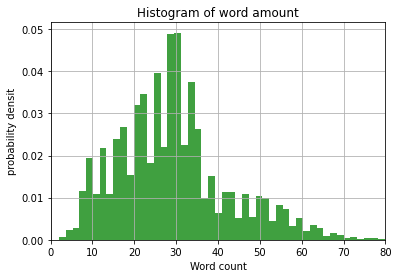

In [13]:
analyzer.word_count('text', 80)

c:\Users\Kuba\Desktop\repo\news_category_predictor\categorizer\analyzer.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Word_count'][a] = unique_category['Word_count'][a] + self.data['word_count'][index]
c:\Users\Kuba\Desktop\repo\news_category_predictor\categorizer\analyzer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\Kuba\Desktop\repo\news_category_predictor\categorizer\analyzer.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

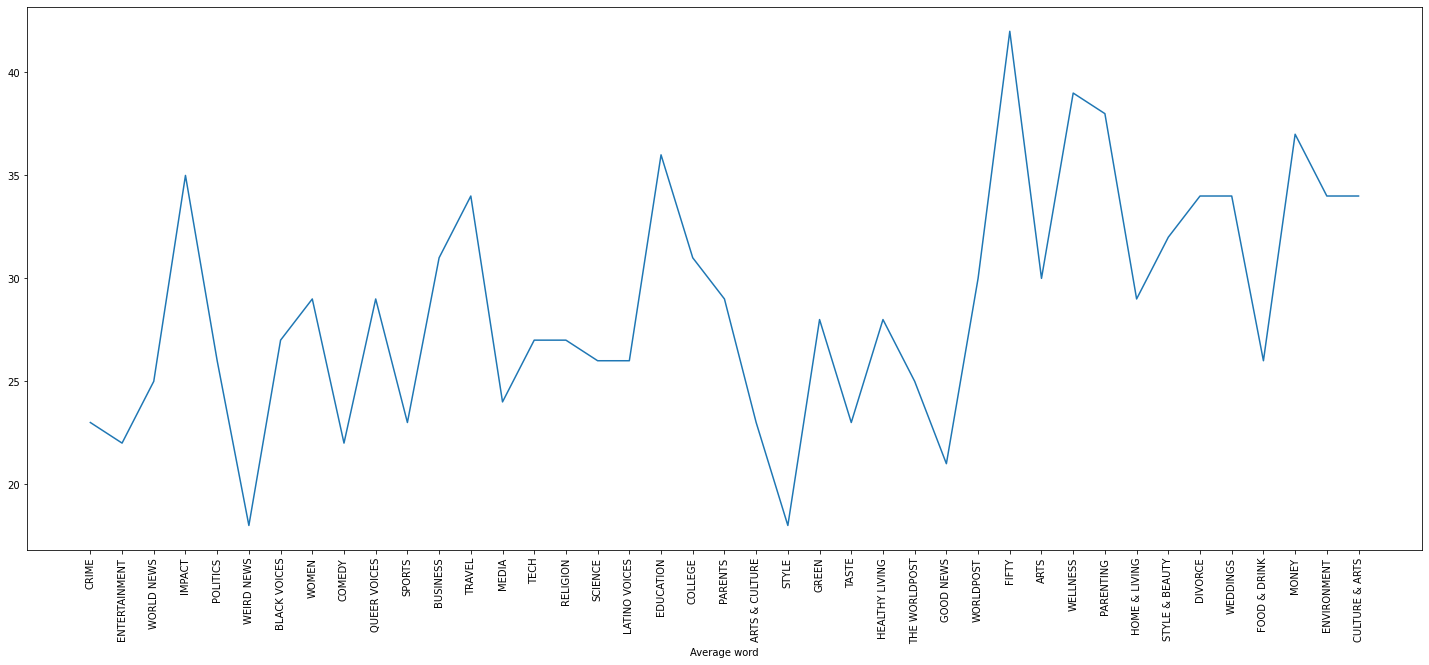

In [19]:
analyzer.word_avg()